In [1]:
import pandas as pd
df = pd.read_csv('mushroom_dataset.csv')
print(len(df[df['class']=='p']))
df
names = list(df)
k = 1
for name in names:
    if df[name].nunique()!=2:
        k+= (df[name].nunique())
    else:
        k+=1
print(k)
list(df)

3916
114


['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [2]:
def encode_onehot(_df, _f):
    _df2 = pd.get_dummies(_df[_f], prefix='', prefix_sep='').groupby(level=0, axis=1).max().add_prefix(_f+' - ')
    _df3 = pd.concat([_df, _df2], axis=1)
    _df3 = _df3.drop([_f], axis=1)
    return _df3

In [3]:
names = list(df)
for name in names:#automating binary replacements
    if df[name].nunique()==2:
        df[name].replace([df[name].unique()[0],df[name].unique()[1]],[0,1],inplace=True)
    else:
        pass
        #df = encode_onehot(df,name)
for name in names:#automating binary replacements
    if df[name].nunique()!=2:
        df = encode_onehot(df,name)
    else:
        pass
        #df = encode_onehot(df,name)
df


,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape - b,cap-shape - c,cap-shape - f,cap-shape - k,...,population - s,population - v,population - y,habitat - d,habitat - g,habitat - l,habitat - m,habitat - p,habitat - u,habitat - w
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,1,0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,1,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [4]:
#y = df['class']
#X = df.drop('class',axis=1)

dfX = df.loc[:, df.columns != 'class']
dfy = df.loc[:, df.columns == 'class'].values.ravel()

# Sanity check
print(f'N={len(dfX)}, M={len(dfX.columns)}')
X = dfX.values
y = dfy

N=8124, M=112


In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# 10-fold CV evaluation of a classifier
def eval_classifier(_clf, _X, _y):
    accuracies = []
    kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
    for train_index, test_index in kf.split(_X, _y):
        _clf.fit(_X[train_index], _y[train_index])
        y_pred = _clf.predict(_X[test_index])
        accuracies += [accuracy_score(_y[test_index], y_pred)]
    return np.array(accuracies)




gnb = GaussianNB()

In [6]:
acc = eval_classifier(GaussianNB(), X, y)
print(f'Naive Bayes CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Naive Bayes CV accuracy=0.91 ±0.084


In [7]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', probability=True)
acc = eval_classifier(svc, X, y)
print(f'SVC accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

SVC accuracy=0.97 ±0.070


In [8]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

acc = eval_classifier(mlp, X, y)
print(f'MLP accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

MLP accuracy=0.96 ±0.094


In [9]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

acc = eval_classifier(dtc, X, y)
print(f'Decision tree accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Decision tree accuracy=0.97 ±0.094


In [10]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

acc = eval_classifier(rfc, X, y)
print(f'Random Forest accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Random Forest accuracy=0.96 ±0.094


In [11]:

# Use _m features randomly selected from _M features
# a total of n_estimators many weak learners
def features_randomsubset(_M, _m, n_estimators=1):
    from numpy.random import choice
    # returns a list of list of column choices - subset features
    return [choice(_M, _m, replace=False) for _ in range(n_estimators)]

In [12]:
def eval_singleweak(_X, _y, _niters, _nfeatures):
    accuracies = []
    for _ in range(_niters):
        # Keep the subset features (i.e. columns) the same for a 10-fold
        cols = features_randomsubset(_X.shape[1], _nfeatures, n_estimators=1)
        # 10-fold CV
        kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
        for train_index, test_index in kf.split(_X, _y):
            clf = weakNB_fit(cols[0], _X[train_index], _y[train_index])
            y_pred, y_prob = weakNB_predict(clf, cols[0], _X[test_index])
            accuracies += [accuracy_score(_y[test_index], y_pred)]
    return np.array(accuracies)

In [13]:
def eval_ensemble(_X, _y, _niter, _n_estimators, _nfeatures):
    accuracies = []
    single_accuracy = []
    for _ in range(_niter):
        # Keep subset features, columns same for a 10-fold
        cols = features_randomsubset(_X.shape[1], _nfeatures, n_estimators=_n_estimators)
        # 10-fold CV
        kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
        for train_index, test_index in kf.split(_X, _y):
            e_clf = ensembleNB_fit(cols, _X[train_index], _y[train_index])
            y_pred = ensembleNB_predict(e_clf, cols, _X[test_index])
            single_y_pred = e_clf[0].fit(_X[train_index], _y[train_index]).predict(_X[test_index])
            accuracies += [accuracy_score(_y[test_index], y_pred)]
            single_accuracy += [accuracy_score(_y[test_index], single_y_pred)]
    return np.array(accuracies),np.array(single_accuracy)

In [14]:
counts = np.unique(y, return_counts=True)
NBpriors = [counts[1][0]/len(y), counts[1][1]/len(y)]

In [15]:
import random

In [16]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .1,stratify=y)
#random.sample(sorted(X_train),5)

In [17]:
NUM_WEAK = 100
def eval_single_weak(_X, _y, _niters, _nfeatures,classifier):
    accuracies = []
    for _ in range(_niters):
        # Keep the subset features (i.e. columns) the same for a 10-fold
        cols = features_randomsubset(_X.shape[1], _nfeatures, n_estimators=1)
        # 10-fold CV
        kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
        for train_index, test_index in kf.split(_X, _y):
            clf = classifier.fit(_X[train_index], _y[train_index])
            y_pred = classifier.predict(_X[test_index])
            accuracies += [accuracy_score(_y[test_index], y_pred)]
    return np.array(accuracies)

gaussian_ensemble = []
svc_ensemble = []
mlp_ensemble = []
decision_tree_ensemble = []
ensembles = [gaussian_ensemble,svc_ensemble,mlp_ensemble,decision_tree_ensemble]
names = ['gaussian','svc','mlp','decision tree']
for i in range(NUM_WEAK):
    gaussian_ensemble.append(GaussianNB())
    svc_ensemble.append(SVC(kernel='linear',probability =True))
    mlp_ensemble.append(MLPClassifier(hidden_layer_sizes=(5, 2),max_iter=30,tol = 1e-1))
    decision_tree_ensemble.append(DecisionTreeClassifier(max_depth=5,max_features=5))
    



In [18]:
for i in range(len(ensembles)):
    acc = eval_single_weak(X,y,10,5,ensembles[i][0])
    print(f'First {names[i]:s} learners average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

First gaussian learners average Acc= 0.91 ±0.084
First svc learners average Acc= 0.97 ±0.070
First mlp learners average Acc= 0.85 ±0.205
First decision tree learners average Acc= 0.88 ±0.118


In [19]:
import random
l = [[1,2,3],[12,4,5],[1,2],[1]]
random.sample(l,2)
print(l)

[[1, 2, 3], [12, 4, 5], [1, 2], [1]]


In [20]:
import random
import numpy as np
from copy import deepcopy
from collections import defaultdict
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .1,stratify=y)
def ensemble_fit(X_train,y_train,ensemble,subsample_ratio = .1):
    X_train_copy = list(deepcopy(X_train))
    y_train_copy = deepcopy(y_train)
    #joined = pd.concat(pd.DataFrame(y_train_copy),(pd.DataFrame(X_train_copy)))
    joined = []
    for i in range(len(X_train_copy)):
        joined.append(np.append(X_train_copy[i],y_train_copy[i]))
    #print(len(joined[0]))
    
    for i in range(len(ensemble)):#ensuring each weak classifier gets at least 1 feature
        s = random.sample(joined,int(subsample_ratio*len(X_train)))
        new_y = []
        #s=s.tolist()
        for k in range(len(s)):
            s[k] = s[k].tolist()
        #print(s)
        t =pd.DataFrame(s)
        """
        for j in range(len(s)):
            new_y.append(s[j][-1])
            
            s[j] = s[:len(s[j])-1]
            #s[j] = np.array(s[j][0],dtype='float')
            #print(len(s[j]))
        print(len(s[1]))
        #s = pd.DataFrame({i:list(s[j][i] for j in range(len(s))) for i in range(len(s[0]))}).values
        d = defaultdict(lambda:[])
        for k in range(len(s)):
            for j in s[k]:
                d[k].append(j)
            
        new_y=pd.DataFrame({0:new_y}).values.ravel()
        """
        #print(s)
        dfX = t.loc[:, [x for x in range(len(s[0])-1)]]
        dfy = t.loc[:, len(s[0])-1].values.ravel()
        X = dfX.values
        y = dfy
        #print(len(y))
        #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0)
        #print(len(s[0]),len(s[1]),len(s[2]))
        ensemble[i].fit(X,y)
    

for e in ensembles:
    ensemble_fit(X_train,y_train,e)


In [21]:
def ensemble_predict(X_test,ensemble):
    predictions = []
    for i in ensemble:
        #subset = pd.DataFrame(X_test).iloc[:,[k for k in sorted(i[1])]]
        predictions.append(i.predict(X_test))
        
    vote = []
    #print(len(predictions))
    for i in range(len(predictions[0])):
        count_0 = 0
        count_1 = 0
        for j in range(len(predictions)):#sorry for not using np.argmax
            if predictions[j][i]==0:
                count_0+=1
            else:
                count_1+=1
        if count_0>=count_1:#0 is poisonous, so >=
            vote.append(0)
        else:
            vote.append(1)
    return vote


In [22]:
for i in range(len(ensembles)):
    y_pred = ensemble_predict(X_test,ensembles[i])
    acc = [accuracy_score(y_test, y_pred)]
    print(f'Ensemble {names[i]:s} average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Ensemble gaussian average Acc= 0.91 ±0.000
Ensemble svc average Acc= 1.00 ±0.000
Ensemble mlp average Acc= 0.89 ±0.000
Ensemble decision tree average Acc= 0.95 ±0.000


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

ratios = [0.005, 0.01, 0.03, 0.05, 0.1]
#ratios = [0.001]+ratios #these ratios are so small they cause an issue with getting enough classes
#ratios = [0.0005]+ratios


def eval_ensemble(_X, _y,ensemble,subsample_ratio):
    accuracies = []

    # 10-fold CV
    kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
    for train_index, test_index in kf.split(_X, _y):
        
        ensemble_fit(_X[train_index],_y[train_index],ensemble,subsample_ratio = subsample_ratio)
        y_pred = ensemble_predict(_X[test_index],ensemble)
        accuracies += [accuracy_score(_y[test_index], y_pred)]

    return np.array(accuracies)

ensembles.append([DecisionTreeClassifier()])
ensembles.append([GaussianNB()])
ensembles.append([SVC(kernel='linear',probability =True)])
ensembles.append([MLPClassifier()])
names.append('single decision tree')
names.append('single Gaussian NB')
names.append('single SVC')
names.append('single MLP')
print(len(ensembles))

8


In [24]:
ensemble_stats=[[[],[],[]] for i in range(len(ensembles))]
for j in ratios:
    print()
    print()
    print(f'For the subsample ratio {j:.5f}:')
    print()
    for i in range(len(ensembles)):
    
        acc = eval_ensemble(X, y,ensembles[i],subsample_ratio=j)
        print(f'Ensemble {names[i]:s} average Acc= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')
        ensemble_stats[i][0].append(j)
        ensemble_stats[i][1].append(np.mean(acc))
        ensemble_stats[i][2].append(np.std(acc))



For the subsample ratio 0.00500:

Ensemble gaussian average Acc= 0.91 ±0.103
Ensemble svc average Acc= 0.93 ±0.092
Ensemble mlp average Acc= 0.59 ±0.139
Ensemble decision tree average Acc= 0.93 ±0.105
Ensemble single decision tree average Acc= 0.93 ±0.067
Ensemble single Gaussian NB average Acc= 0.90 ±0.102
Ensemble single SVC average Acc= 0.92 ±0.106
Ensemble single MLP average Acc= 0.88 ±0.110


For the subsample ratio 0.01000:

Ensemble gaussian average Acc= 0.91 ±0.099
Ensemble svc average Acc= 0.93 ±0.093
Ensemble mlp average Acc= 0.64 ±0.168
Ensemble decision tree average Acc= 0.93 ±0.109
Ensemble single decision tree average Acc= 0.93 ±0.090
Ensemble single Gaussian NB average Acc= 0.87 ±0.132
Ensemble single SVC average Acc= 0.91 ±0.102
Ensemble single MLP average Acc= 0.91 ±0.118


For the subsample ratio 0.03000:

Ensemble gaussian average Acc= 0.84 ±0.082
Ensemble svc average Acc= 0.94 ±0.106
Ensemble mlp average Acc= 0.78 ±0.161
Ensemble decision tree average Acc= 0.93 ±0

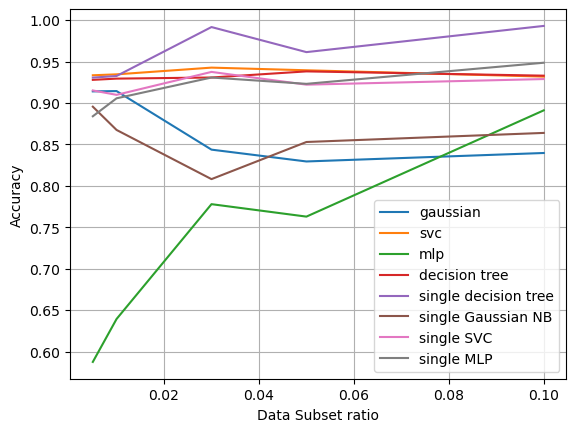

In [25]:

for i in range(len(ensembles)):
    plt.plot(ensemble_stats[i][0], ensemble_stats[i][1], label=names[i])
    #plt.fill_between(ensemble_stats[i][0], ensemble_stats[i][1]-ensemble_stats[i][2], ensemble_stats[i][1]-ensemble_stats[i][2], alpha=0.5)
plt.xlabel('Data Subset ratio')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()